In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

In [53]:
kaggle_ds = pd.read_csv('data/ielts_writing_dataset.csv')
# kaggle2 = pd.read_csv('data/ielts-writing-essays.csv')
huggingface_ds = load_dataset("chillies/IELTS-writing-task-2-evaluation")['train']
huggingface_ds = pd.DataFrame(huggingface_ds)

In [54]:
kaggle_ds = kaggle_ds[kaggle_ds['Task_Type'] == 2]
kaggle_ds = kaggle_ds[['Question', 'Essay', 'Examiner_Commen', 'Overall']]
kaggle_ds = kaggle_ds.dropna(subset=['Examiner_Commen'])
print("Total number of entries after filtering:", kaggle_ds.shape[0])

Total number of entries after filtering: 62


In [55]:
kaggle_ds['Overall'] = kaggle_ds['Overall'].astype(str).replace(r'\.0$', '', regex=True)
score_counts = kaggle_ds['Overall'].value_counts().sort_index()
print(score_counts)

Overall
5     8
6    24
7    17
8    13
Name: count, dtype: int64


In [56]:
huggingface_ds['band'] = huggingface_ds['band'].astype(str).replace(r'[\n\r]+', '', regex=True)
huggingface_ds['band'] = huggingface_ds['band'].astype(str).replace(r'\.0$', '', regex=True)


In [57]:
score_counts = huggingface_ds['band'].value_counts().sort_index()
print(score_counts)

band
4       594
4.5     646
5      1049
5.5     955
6      1143
6.5    1168
7      1358
7.5    1105
8       700
8.5     433
9       108
<4      574
Name: count, dtype: int64


In [58]:
huggingface_ds.columns

Index(['prompt', 'essay', 'evaluation', 'band'], dtype='object')

In [59]:
kaggle_ds.columns

Index(['Question', 'Essay', 'Examiner_Commen', 'Overall'], dtype='object')

In [60]:
kaggle_ds.rename(columns={
    'Question': 'prompt', 
    'Essay': 'essay', 
    'Examiner_Commen': 'evaluation', 
    'Overall': 'band'
}, inplace=True)

In [61]:
kaggle_ds.columns

Index(['prompt', 'essay', 'evaluation', 'band'], dtype='object')

In [62]:
combined_ds = pd.concat([huggingface_ds, kaggle_ds], ignore_index=True)
combined_ds.shape

(9895, 4)

In [67]:
score_counts = combined_ds['band'].value_counts().sort_index()
print(score_counts)

band
4       594
4.5     646
5      1057
5.5     955
6      1167
6.5    1168
7      1375
7.5    1105
8       713
8.5     433
9       108
<4      574
Name: count, dtype: int64


In [66]:
combined_ds.to_csv('data/combined_dataset.csv', index=False)

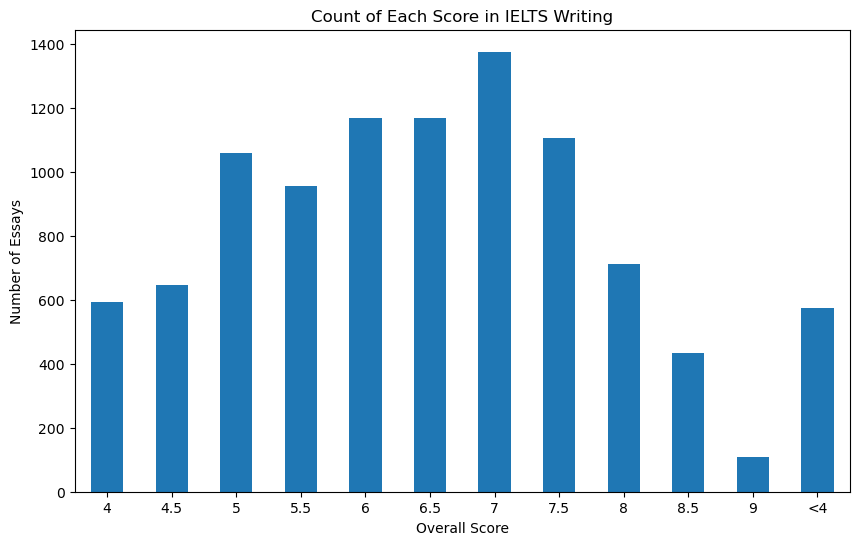

In [65]:
score_counts = combined_ds['band'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
score_counts.plot(kind='bar')
plt.title('Count of Each Score in IELTS Writing')
plt.xlabel('Overall Score')
plt.ylabel('Number of Essays')
plt.xticks(rotation=0)
plt.show()